In [6]:
import xarray as xr
import glob

In [7]:
def open_frompp(pp,ppname,out,local,time,var,get_static=True):
    _,paths = get_pathspp(pp,ppname,out,local,time,var,get_static=get_static)
    return xr.open_mfdataset(paths,use_cftime=True)

def get_pathspp(pp,ppname,out,local,time,var,get_static=True):
    filename = ".".join([ppname,time,var,'nc'])
    path = "/".join([pp,ppname,out,local,filename])
    paths = glob.glob(path)
    if get_static:
        static = ".".join([ppname,'static','nc'])
        paths.append("/".join([pp,ppname,static]))
    return path,paths

def get_pathstatic(pp,ppname):
    static = ".".join([ppname,'static','nc'])
    path = "/".join([pp,ppname,static])
    return path

In [32]:
pathDict = {'pp':('/archive/Richard.Slater/Siena/'+
                  'siena_201308_rds-c3-gat-slurm/'+
                  'MOM5_SIS_BLING_CORE2-spinup-intel19/'+
                  'gfdl.ncrc3-intel19-prod-openmp/pp'),
           'ppname':'ocean_bling_ctrl_tracers',
           'out':'ts',
           'local':'annual/20yr',
           'time':'*',#['0{}*'.format(i) for i in range(28,34)],
           'var':'fpop_100',
           }

In [33]:
ds = open_frompp(**pathDict,get_static=False)
grid = xr.open_dataset(pathDict['pp']+'/'+'static.nc')

In [34]:
gi = ds['fpop_100'].weighted(grid['area_t']).sum(['xt_ocean','yt_ocean'])

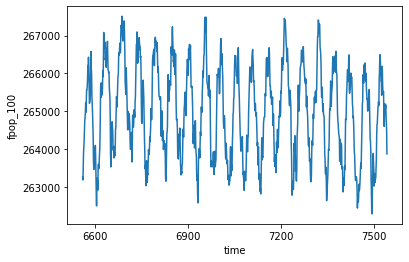

In [35]:
gi.plot()

In [37]:
ds

<xarray.Dataset>
Dimensions:         (nv: 2, scalar_axis: 1, st_edges_ocean: 51, st_ocean: 50, time: 980, xt_ocean: 360, yt_ocean: 200)
Coordinates:
  * xt_ocean        (xt_ocean) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yt_ocean        (yt_ocean) float64 -81.5 -80.5 -79.5 ... 87.5 88.5 89.5
  * time            (time) object 6561-07-02 12:00:00 ... 7540-07-02 12:00:00
  * nv              (nv) float64 1.0 2.0
  * scalar_axis     (scalar_axis) float64 0.0
  * st_ocean        (st_ocean) float64 5.0 15.0 25.0 ... 4.95e+03 5.316e+03
  * st_edges_ocean  (st_edges_ocean) float64 0.0 10.0 20.0 ... 5.133e+03 5.5e+03
Data variables:
    fpop_100        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(20, 200, 360), meta=np.ndarray>
    time_bounds     (time, nv) timedelta64[ns] dask.array<chunksize=(20, 2), meta=np.ndarray>
Attributes:
    filename:   65610101.ocean_bling_ctrl_tracers.nc
    title:      MOM5_SIS_BLING_CORE2-spinup-intel19
    grid_type:  mosaic
    grid_tile:  1
    history:    2021-09-01 15:04:32 -0400: PostProcessing::PPNetCDF::time_mea...